<a href="https://colab.research.google.com/github/Real1CM/MLassignment/blob/main/2024_10_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

这是项目结构，我将数据集重命名放入content目录下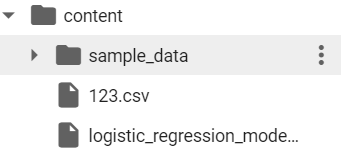

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# 1. 数据导入
data = pd.read_csv('./123.csv')
print("数据集的前5行：")
print(data.head())

# 2. 数据预处理
# 将'M'和'B'转换为二进制分类 (M=1, B=0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# 删除id列
data = data.drop(['id'], axis=1)
print("\n数据集信息：")
print(data.info())

# 分离特征与标签
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# 将数据集划分为训练集和测试集，80%训练集，20%测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n训练集和测试集的大小：")
print(f"训练集大小: {X_train.shape[0]}, 测试集大小: {X_test.shape[0]}")

# 3. 数据归一化处理
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("\n数据归一化完成。")

# 4. 构建逻辑回归模型
model = LogisticRegression(max_iter=10000)

# 训练模型
model.fit(X_train, y_train)
print("\n模型训练完成。")

# 保存模型
joblib.dump(model, 'logistic_regression_model.pkl')
print("模型已保存为 'logistic_regression_model.pkl'。")

# 5. 加载预训练模型，预测测试集
loaded_model = joblib.load('logistic_regression_model.pkl')
y_pred = loaded_model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"\n测试集上的准确率: {accuracy:.2f}")

# 额外的模型评估信息
print("\n分类报告：")
print(classification_report(y_test, y_pred))

print("混淆矩阵：")
print(confusion_matrix(y_test, y_pred))


数据集的前5行：
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst 